<a href="https://colab.research.google.com/github/DaveCub/ML/blob/main/Team4_Project_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 99.092
> 99.133
> 98.925
> 99.233
> 99.233


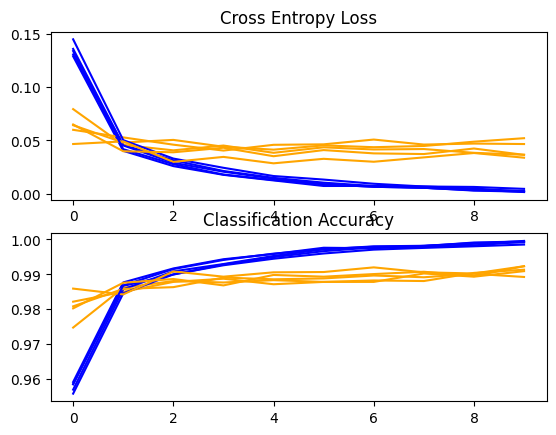

Accuracy: mean=99.123 std=0.114, n=5


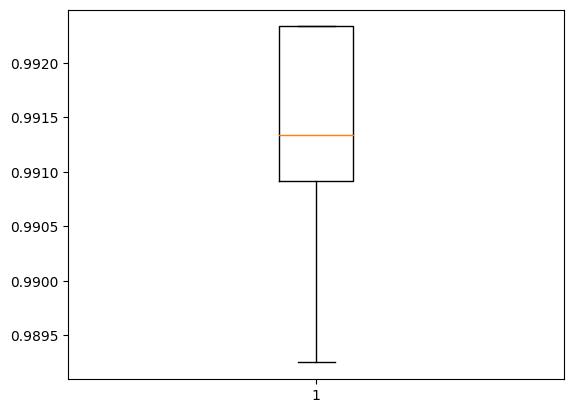

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 128)         147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2048)             

Saving cinco.jpeg to cinco.jpeg


/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
Predicted digit:  6


In [3]:
# --- import libraries --------------------------------------------------
from numpy import mean
from numpy import std
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Ftrl
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import shutil
from google.colab import drive

trai=1      # 0-not to train model...........1- train model again
pred=1      # 0-not to predict new image.....1-predit new image
# ---- load train and test dataset --------------------------------------
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()   # load dataset
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))  # reshape dataset to have a single channel
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainY = to_categorical(trainY)                        # one hot encode target values
    testY = to_categorical(testY)
	#-- scale pixels  --------
    train_norm = trainX.astype('float32')                  # convert from integers to floats
    test_norm = testX.astype('float32')
    trainX = train_norm / 255.0                            # normalize to range 0-1
    testX = test_norm / 255.0
    return trainX, trainY, testX, testY

#---- define cnn model --------------------------------------------------------
def define_model():
	model = Sequential()                   # sequential type model
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # input layer (convolutional)
	model.add(MaxPooling2D((2, 2)))        # Downsamples input dimension by taking maximum value over an input window
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform')) # 2nd (convolutional) layer
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform')) # 3rd (convolutional) layer
	model.add(MaxPooling2D((2, 2)))        # Downsamples input dimension by taking maximum value over an input window
	model.add(Flatten())                   # Flatten layer
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))    # core layer
	model.add(Dense(10, activation='softmax'))                                   # output layer (dimension=10)
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)                                  # Stochastic Gradient descend optimizer
	#opt = RMSprop(learning_rate=0.001, momentum=0.0)                            # RMSprop (Root Mean Square) Optimizer
	#opt = Adam(learning_rate=0.001)                                             # Adaptive moment estimation.  Optimizer
	#opt = Adadelta(learning_rate=0.001)                                         # Adaptive learning rate
	#opt = Nadam(learning_rate=0.001)                                            # Like Adam but with Nesterov momentum.
	#opt = Ftrl(learning_rate=0.01)                                              # Follow The Regularized Leader
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # compile model
	return model

# ----- evaluate a model using k-fold cross-validation ----------------------
def train_evaluate_model(dataX, dataY, n_folds=5):       # n-folds define the number of cycles
 trainX, trainY, testX, testY = load_dataset()           # load dataset
 #trainX, testX = prep_pixels(trainX, testX)              # scale pixels
 scores, histories = list(), list()                      # initialize a empty list
 kfold = KFold(n_folds, shuffle=True, random_state=1)    # prepare cross validation
 for train_ix, test_ix in kfold.split(trainX):           # enumerate splits
    model = define_model()                               # define model
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]           # select rows for train and test
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)   # fit model
    _, acc = model.evaluate(testX, testY, verbose=0)     # evaluate model
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)                                   # store scores
    histories.append(history)                            # store histories
 model.save('final_model.h5')
# files.download('final_model.h5')
 return scores, histories

# -------- plot diagnostic learning curves -----------------------------------
def summarize_model(histories,scores):
 for i in range(len(histories)):
  plt.subplot(2, 1, 1)           # plot loss
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  plt.subplot(2, 1, 2)           # plot accuracy
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
 plt.show()
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))   # print summary
 plt.boxplot(scores)             # box and whisker plots of results
 plt.show()

#------ run the test for evaluating a model --------------------------
def run_evaluation():
 trainX, trainY, testX, testY = load_dataset()             # load dataset and pre-process image (slace pixels)
 scores, histories = train_evaluate_model(trainX, trainY)  # evaluate model
 return scores, histories

# --------- load and prepare the new image -----------------------------------
def load_image(filename):
 img = load_img(filename, grayscale=True, target_size=(28, 28)) # load the image
 img = img_to_array(img)                                        # convert to array
 img = img.reshape(1, 28, 28, 1)                                # reshape into a single sample with 1 channel
 img = img.astype('float32')                                    # prepare pixel data
 img = img / 255.0
 return img

# ----- load an image and predict the class --------------------------------
def predict():
 model = load_model('final_model.h5')
 imagen = files.upload()                       # button for choosin image
 img = load_image(list(imagen.keys())[0])      # call load_image function
 predict_value = model.predict(img)            # predict the class
 digit = argmax(predict_value)                 # get the max probab class
 print('Predicted digit:  %i' % (digit))

#-----------------------------------------------------------------------------
#--------------------------- MAIN CODE ---------------------------------------
#-----------------------------------------------------------------------------
if trai==1:                                    # if we decide to train the model again
	   scores, histories =run_evaluation()     # fit and evaluate model accuracy
# else:

try:
    model = load_model('final_model.h5')
except:                                        # if we decide to load the trainned model from local file
    print('PLEASE SELECT TRAINNED MODEL .H5')
    modelo = files.upload()                    # button for choosin model
    model = load_model(list(modelo.keys())[0]) # load the selected model

summarize_model(histories,scores)
model.summary()

#model = load_model('final_model.h5')

# --- LOAD NEW IMAGE FOR RECOGNIZE DIGIT --------
print('PLEASE SELECT NEW IMAGE FOR PREDICT DIGIT')
if pred==1:
 predict()                            # run example of 1 photo

